# 大数定律的模拟
根据不同的样本量，模拟样本均值的收敛性。

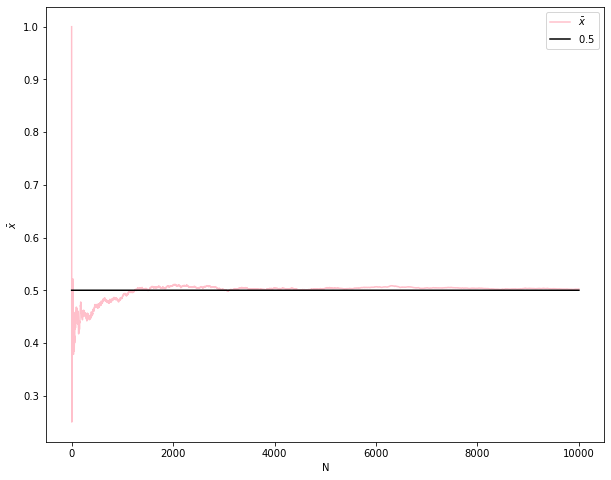

In [1]:
import numpy as np
from numpy import random as nprd

True_P = 0.5


def sampling(N):
    ## 产生Bernouli样本
    x = nprd.rand(N) < True_P
    return x


M = 10000  #模拟次数
xbar = np.zeros(M)
N = np.array([i + 1 for i in range(M)])
x = sampling(M)
for i in range(M):
    if i == 0:
        xbar[i] = x[i]
    else:
        xbar[i] = (x[i] + xbar[i - 1] * i) / (i + 1)

## 导入matplotlib
import matplotlib.pyplot as plt
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.plot(N, xbar, label=r'$\bar{x}$', color='pink')  ## xbar
xtrue = np.ones(M) * True_P
plt.plot(N, xtrue, label=r'$0.5$', color='black')  ## true xbar
plt.xlabel('N')
plt.ylabel(r'$\bar{x}$')
plt.legend(loc='upper right', frameon=True)
plt.savefig("simulate_LLN.pdf")
plt.show() 

# 中心极限定理的模拟
根据不同的样本量（N），模拟2000次样本均值，并观察给定样本量的条件下2000次样本均值的分布情况。按照中心极限定理，当样本量足够大时，样本均值的分布应该趋向于正态分布。

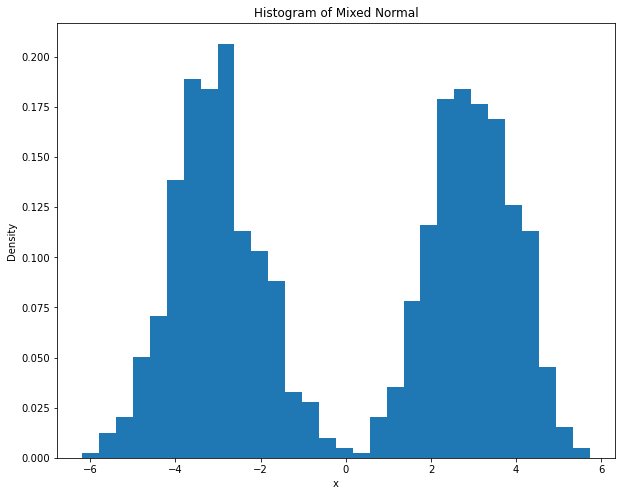

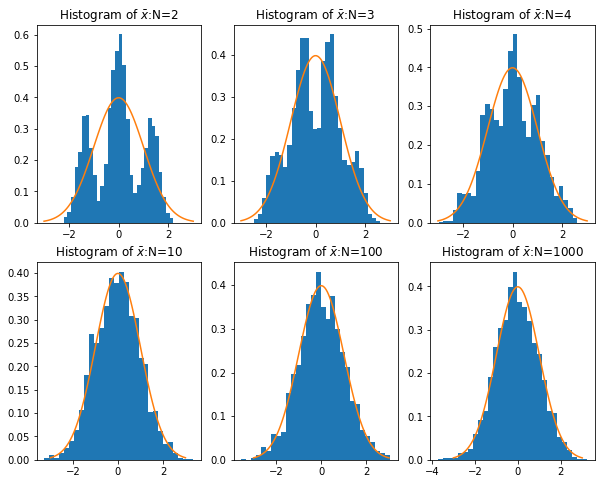

In [2]:
import numpy as np
from numpy import random as nprd


def sampling(N):
    ## 产生一组样本，以0.5的概率为z+3，0.5的概率为z-3，其中z~N(0,1)
    d = nprd.rand(N) < 0.5
    z = nprd.randn(N)
    x = np.array([z[i] + 3 if d[i] else z[i] - 3 for i in range(N)])
    return x


N = [2, 3, 4, 10, 100, 1000]  # sample size
M = 2000
MEANS = []
for n in N:
    mean_x = np.zeros(M)
    for i in range(M):
        x = sampling(n)
        mean_x[i] = np.mean(x) / np.sqrt(10 / n)  ## 标准化，因为var(x)=10
    MEANS.append(mean_x)

## 导入matplotlib
import matplotlib.pyplot as plt

# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 8.0)

x = sampling(1000)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Mixed Normal')
plt.hist(x, bins=30, density=True)  ## histgram
plt.savefig("simulate_CLT_mix.pdf")
plt.show() 

## 均值
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 3, 4)
ax5 = plt.subplot(2, 3, 5)
ax6 = plt.subplot(2, 3, 6)

## normal density
x = np.linspace(-3, 3, 100)
d = [1.0 / np.sqrt(2 * np.pi) * np.exp(-i**2 / 2) for i in x]


def plot_density(ax, data, N):
    ax.hist(data, bins=30, density=True)  ## histgram
    ax.plot(x, d)
    ax.set_title(r'Histogram of $\bar{x}$:N=%d' % N)


plot_density(ax1, MEANS[0], N[0])
plot_density(ax2, MEANS[1], N[1])
plot_density(ax3, MEANS[2], N[2])
plot_density(ax4, MEANS[3], N[3])
plot_density(ax5, MEANS[4], N[4])
plot_density(ax6, MEANS[5], N[5])
plt.savefig("simulate_CLT.pdf")
plt.show() 


# 重对数率

重对数率（law of iterated logarithm）即，对于独立同分布的$Y_1, ... , Y_n$，其中$E\left(Y_i\right)=0, V\left(Y_i\right)=1$，有：$$\limsup_{n\rightarrow \infty} \frac{Y_1+...+Y_n}{\sqrt{n\ln\ln n}}=\sqrt{2}$$

/tmp/ipykernel_26631/2296696933.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, [np.sqrt(2 * (n + 1) * np.log(np.log(n + 1))) for n in t],
/tmp/ipykernel_26631/2296696933.py:26: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(t, [np.sqrt(2 * (n + 1) * np.log(np.log(n + 1))) for n in t],
/tmp/ipykernel_26631/2296696933.py:28: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, [-np.sqrt(2 * (n + 1) * np.log(np.log(n + 1))) for n in t],
/tmp/ipykernel_26631/2296696933.py:28: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(t, [-np.sqrt(2 * (n + 1) * np.log(np.log(n + 1))) for n in t],


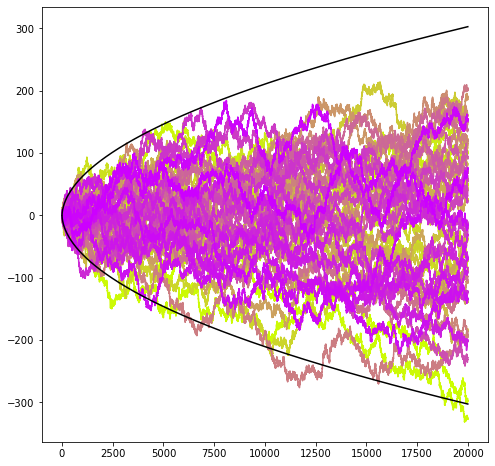

In [3]:
import numpy as np
import numpy.random as nprd


def gen_path(T):
    X = []
    x = 0
    for t in range(T):
        x += nprd.normal()
        X.append(x)
    return X


import matplotlib.pyplot as plt

# 设定图像大小
plt.rcParams['figure.figsize'] = (8.0, 8.0)
fig = plt.figure()
N = 50
T = 20000
t = list(range(T))
corlors = np.linspace(0, 1, N)
for i in range(N):
    x = gen_path(T)
    plt.plot(t, x, color=(0.8, 1 - corlors[i], corlors[i]))
plt.plot(t, [np.sqrt(2 * (n + 1) * np.log(np.log(n + 1))) for n in t],
         color=(0, 0, 0))
plt.plot(t, [-np.sqrt(2 * (n + 1) * np.log(np.log(n + 1))) for n in t],
         color=(0, 0, 0))
plt.show() 
fig.savefig("law_iterated_log.pdf")

/tmp/ipykernel_26631/1083810875.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, [x[n] / np.sqrt((n + 1) * np.log(np.log(n + 1))) for n in t],
/tmp/ipykernel_26631/1083810875.py:6: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(t, [x[n] / np.sqrt((n + 1) * np.log(np.log(n + 1))) for n in t],


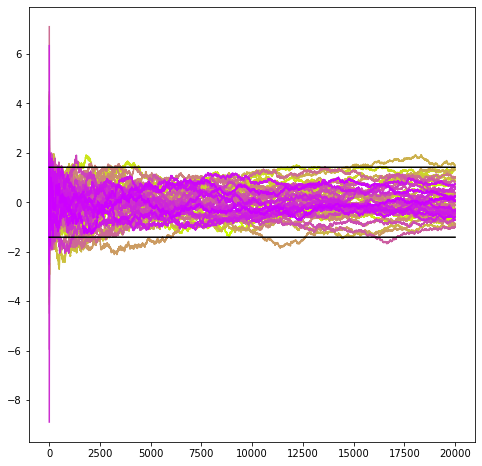

In [4]:
t = list(range(T))
fig1 = plt.figure()
corlors = np.linspace(0, 1, N)
for i in range(N):
    x = gen_path(T)
    plt.plot(t, [x[n] / np.sqrt((n + 1) * np.log(np.log(n + 1))) for n in t],
             color=(0.8, 1 - corlors[i], corlors[i]))
plt.plot(t, [np.sqrt(2) for n in t], color=(0, 0, 0))
plt.plot(t, [-np.sqrt(2) for n in t], color=(0, 0, 0))
plt.show() 
fig1.savefig("law_iterated_log2.pdf")